# Exercise

Use the code in this notebook to complete the following exercises:

1. For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.
    
 1. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

1. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

# DF1

In [3]:
#looking at the data
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [4]:
#it does have a time two 
df1.time.value_counts()

two    100
one    100
Name: time, dtype: int64

<AxesSubplot:xlabel='time'>

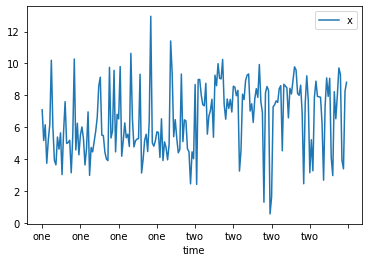

In [40]:
#visualize time and x
df1.plot(x='time',y='x')

In [20]:
x1 = df1[df1.time == 'one'].x
x2 = df1[df1.time == 'two'].x

In [21]:
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-5.443902721870268, pvalue=1.5320971681720834e-07)

# DF2

In [17]:
#looking at the data
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


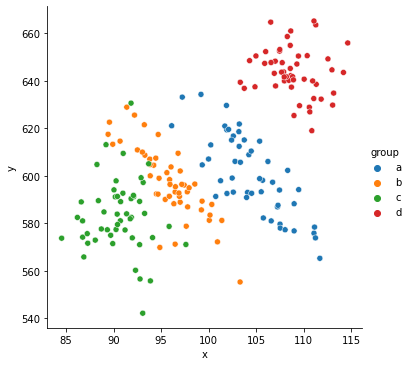

In [43]:
sns.relplot(x='x',y='y', hue='group', data = df2)

Seems like an overall positive, but it looks random.

In [22]:
r, p = stats.pearsonr(df2.x, df2.y)

In [23]:
r, p

(0.5693902765694356, 1.3960403186192216e-18)

# DF3

In [25]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [26]:
df3.surgeon.value_counts()

B    520
A    480
Name: surgeon, dtype: int64

In [29]:
df3.groupby('surgeon').mean()

,success
surgeon,
A,0.877083
B,0.723077


surgeon A has a higher success rate

In [31]:
df3new = df3.where(df3.surgery=='heart bypass')

In [34]:
df3new = df3new.dropna()

In [35]:
df3new.groupby('surgeon').mean()

,success
surgeon,
A,0.656566
B,0.672249
